In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [103]:
dataset=pd.read_csv('HousePrice.csv')

In [104]:
dataset.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           500000 non-null  int64
 1   Garage         500000 non-null  int64
 2   FirePlace      500000 non-null  int64
 3   Baths          500000 non-null  int64
 4   White Marble   500000 non-null  int64
 5   Black Marble   500000 non-null  int64
 6   Indian Marble  500000 non-null  int64
 7   Floors         500000 non-null  int64
 8   City           500000 non-null  int64
 9   Solar          500000 non-null  int64
 10  Electric       500000 non-null  int64
 11  Fiber          500000 non-null  int64
 12  Glass Doors    500000 non-null  int64
 13  Swiming Pool   500000 non-null  int64
 14  Garden         500000 non-null  int64
 15  Prices         500000 non-null  int64
dtypes: int64(16)
memory usage: 61.0 MB


In [21]:
dataset.describe()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000
mean,124.929554,2.001290,2.003398,2.998074,0.332992,0.332690,0.334318,0.499386,2.000940,0.498694,0.50065,0.500468,0.49987,0.500436,0.501646,42050.139350
std,71.795363,0.817005,1.414021,1.414227,0.471284,0.471177,0.471752,0.500000,0.816209,0.499999,0.50000,0.500000,0.50000,0.500000,0.499998,12110.237201
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.00000,1.000000,0.00000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,77975.000000


In [22]:
dataset.shape

(500000, 16)

array([[<AxesSubplot:title={'center':'Area'}>,
        <AxesSubplot:title={'center':'Garage'}>,
        <AxesSubplot:title={'center':'FirePlace'}>,
        <AxesSubplot:title={'center':'Baths'}>],
       [<AxesSubplot:title={'center':'White Marble'}>,
        <AxesSubplot:title={'center':'Black Marble'}>,
        <AxesSubplot:title={'center':'Indian Marble'}>,
        <AxesSubplot:title={'center':'Floors'}>],
       [<AxesSubplot:title={'center':'City'}>,
        <AxesSubplot:title={'center':'Solar'}>,
        <AxesSubplot:title={'center':'Electric'}>,
        <AxesSubplot:title={'center':'Fiber'}>],
       [<AxesSubplot:title={'center':'Glass Doors'}>,
        <AxesSubplot:title={'center':'Swiming Pool'}>,
        <AxesSubplot:title={'center':'Garden'}>,
        <AxesSubplot:title={'center':'Prices'}>]], dtype=object)

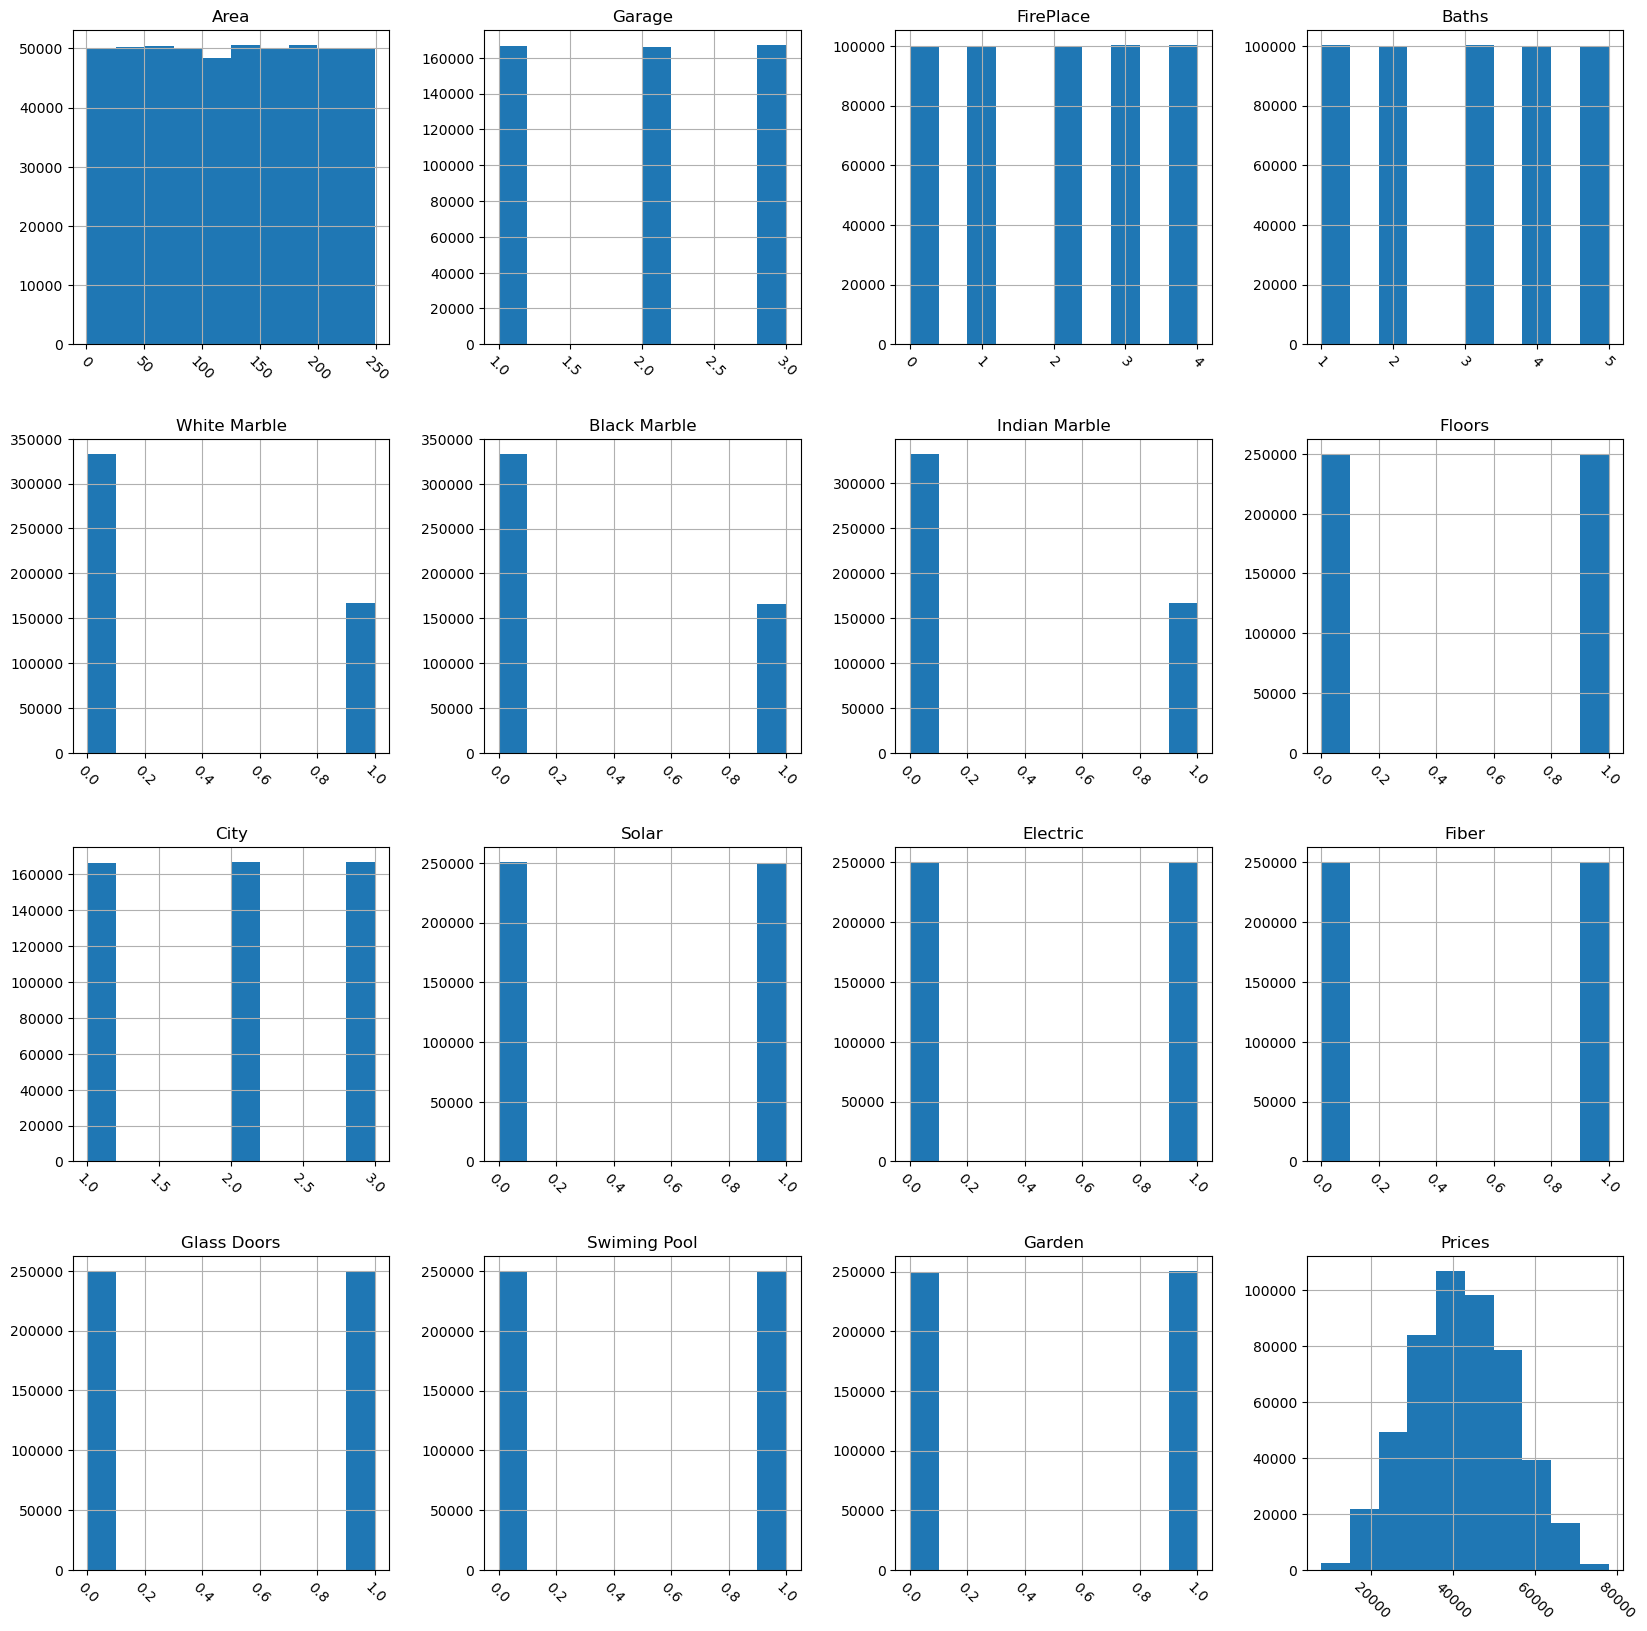

In [23]:
dataset.hist(figsize=(20,20), xrot=-45)


<AxesSubplot:ylabel='City'>

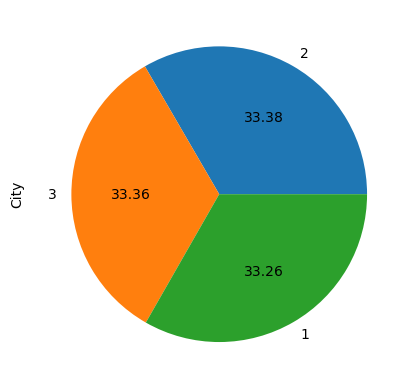

In [24]:
dataset['City'].value_counts().plot(kind="pie", autopct="%.2f")

In [25]:
cutoffs = [30000,60000,90000]
# Create a new column for price categories
dataset['price_category'] = ''

# Iterate through each row and assign the category
for i, Prices in dataset['Prices'].iteritems():
    if Prices <= cutoffs[0]:
        dataset.at[i, 'price_category'] = 'Low'
    elif Prices <= cutoffs[1]:
        dataset.at[i, 'price_category'] = 'Average'
    else:
        dataset.at[i, 'price_category'] = 'High'

# Save the updated dataset
dataset.to_csv('your_updated_dataset.csv', index=False)

In [27]:
dataset=dataset.drop(["Prices"],axis=1)

In [28]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Area            500000 non-null  int64 
 1   Garage          500000 non-null  int64 
 2   FirePlace       500000 non-null  int64 
 3   Baths           500000 non-null  int64 
 4   White Marble    500000 non-null  int64 
 5   Black Marble    500000 non-null  int64 
 6   Indian Marble   500000 non-null  int64 
 7   Floors          500000 non-null  int64 
 8   City            500000 non-null  int64 
 9   Solar           500000 non-null  int64 
 10  Electric        500000 non-null  int64 
 11  Fiber           500000 non-null  int64 
 12  Glass Doors     500000 non-null  int64 
 13  Swiming Pool    500000 non-null  int64 
 14  Garden          500000 non-null  int64 
 15  price_category  500000 non-null  object
dtypes: int64(15), object(1)
memory usage: 61.0+ MB


In [29]:
dataset.groupby('price_category').size()

price_category
Average    377954
High        36961
Low         85085
dtype: int64

<AxesSubplot:xlabel='price_category', ylabel='count'>

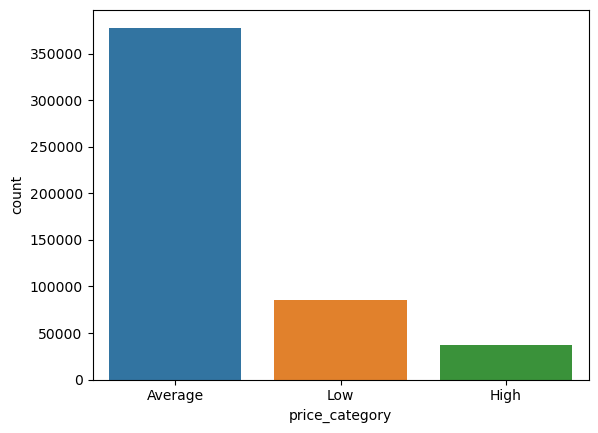

In [30]:
sns.countplot(x = 'price_category', data=dataset, order = dataset['price_category'].value_counts().index)

In [31]:
from sklearn.utils import resample
ds_low = dataset[(dataset['price_category']=="Low")] 
ds_average = dataset[(dataset['price_category']=="Average")] #
ds_high = dataset[(dataset['price_category']=="High")]

ds_low_upsampled = resample(ds_low,
                                 replace=True,   
                                 n_samples= 377954,
                                 random_state=42) 
                                  
ds_high_upsampled = resample(ds_high,
                                 replace=True,
                                 n_samples= 377954,
                                 random_state=42)  


dataset = pd.concat([ds_low_upsampled,ds_high_upsampled, ds_average])

In [32]:
dataset.groupby('price_category').size()

price_category
Average    377954
High       377954
Low        377954
dtype: int64

<AxesSubplot:xlabel='price_category', ylabel='count'>

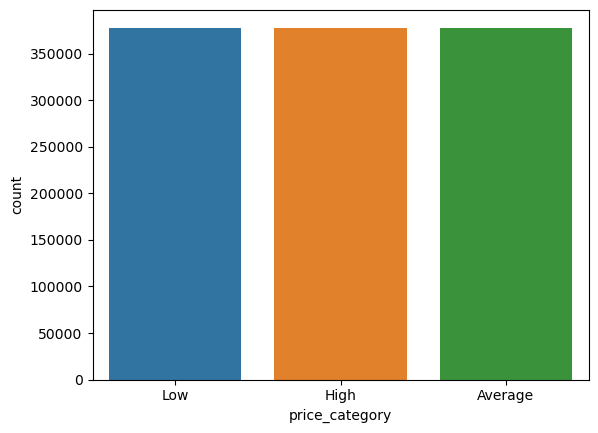

In [33]:
sns.countplot(x = 'price_category', data=dataset, order = dataset['price_category'].value_counts().index)

In [34]:
dataset['price_category'].unique()

array(['Low', 'High', 'Average'], dtype=object)

In [35]:
cat = {'Average':0,'Low':1,'High':2}
dataset['price_category'] = dataset['price_category'].map(cat)

<AxesSubplot:xlabel='price_category', ylabel='count'>

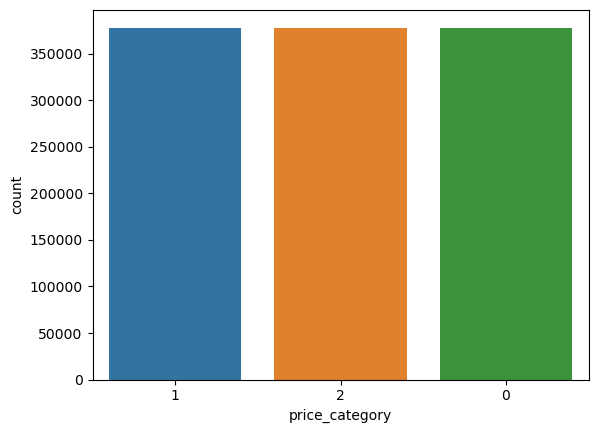

In [36]:
sns.countplot(x = 'price_category', data=dataset, order = dataset['price_category'].value_counts().index)

In [37]:
x=dataset.iloc[:,:-1].values 
y=dataset.iloc[:,-1].values

In [38]:
x

array([[191,   1,   2, ...,   1,   0,   0],
       [159,   1,   2, ...,   1,   0,   1],
       [ 69,   3,   0, ...,   0,   1,   0],
       ...,
       [128,   3,   4, ...,   1,   1,   1],
       [174,   3,   3, ...,   0,   1,   0],
       [ 46,   2,   4, ...,   0,   0,   0]], dtype=int64)

In [39]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [41]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (793703, 15)
y_train:  (793703,)
x_test:  (340159, 15)
y_test:  (340159,)


In [42]:
#classification 

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_lr = LogisticRegression(max_iter = 600) #loading the algorith
model_lr.fit(x_train, y_train)
y_pred_lr = model_lr.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_lr)*100)

Accuracy :  99.40204433808896


C:\Users\faris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
#Desicion tree classifier

from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_pred_dt = model_dt.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_dt)*100)

Accuracy :  99.70866565341503


In [44]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)

y_pred_nb = model_nb.predict(x_test)
print("Accuracy : ", accuracy_score(y_test, y_pred_nb)*100)

Accuracy :  89.17712011147728


In [46]:
Category = 'Average':0,'Low':1,'High':2

Xnew = [[243,1,0,2,0,0,1,1,1,0,0,0,0,1,0]]

ynew = model_lr.predict(Xnew)

print(ynew)

[1]


In [118]:
#Regression

from sklearn.linear_model import LinearRegression
from sklearn import metrics
regressor=LinearRegression()
regressor


LinearRegression()

In [119]:
dataset=pd.read_csv('HousePrice.csv')

In [120]:
dataset.describe()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000
mean,124.929554,2.001290,2.003398,2.998074,0.332992,0.332690,0.334318,0.499386,2.000940,0.498694,0.50065,0.500468,0.49987,0.500436,0.501646,42050.139350
std,71.795363,0.817005,1.414021,1.414227,0.471284,0.471177,0.471752,0.500000,0.816209,0.499999,0.50000,0.500000,0.50000,0.500000,0.499998,12110.237201
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.00000,1.000000,0.00000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,77975.000000


In [121]:
x=dataset.iloc[:,:-1].values   
y=dataset.iloc[:,-1].values 

In [122]:
x

array([[164,   2,   0, ...,   1,   0,   0],
       [ 84,   2,   0, ...,   1,   1,   1],
       [190,   2,   4, ...,   0,   0,   0],
       ...,
       [174,   3,   3, ...,   0,   1,   0],
       [121,   1,   4, ...,   1,   0,   0],
       [ 46,   2,   4, ...,   0,   0,   0]], dtype=int64)

In [123]:
y

array([43800, 37550, 49500, ..., 51350, 62725, 32150], dtype=int64)

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [125]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [126]:
regressor=LinearRegression()
regressor
regressor.fit(x_train,y_train)
y_pred_test=regressor.predict(x_test)
y_pred_train=regressor.predict(x_train)

In [127]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_train,y_pred_train))

Mean Absolute Error: 1.2874952517449856e-10


In [128]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred_test))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred_test)))

Mean Squared Error: 2.2402740935171713e-20
Root Mean Squared Error: 1.4967545201258525e-10


In [129]:
Xnew = [[154,3,4,5,1,0,0,1,2,1,1,1,0,0,0]]

ynew = regressor.predict(Xnew)

print(ynew)

[67850.]


In [143]:


#Clustering using all data

dataset=pd.read_csv('HousePrice.csv')
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram

In [133]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           500000 non-null  int64
 1   Garage         500000 non-null  int64
 2   FirePlace      500000 non-null  int64
 3   Baths          500000 non-null  int64
 4   White Marble   500000 non-null  int64
 5   Black Marble   500000 non-null  int64
 6   Indian Marble  500000 non-null  int64
 7   Floors         500000 non-null  int64
 8   City           500000 non-null  int64
 9   Solar          500000 non-null  int64
 10  Electric       500000 non-null  int64
 11  Fiber          500000 non-null  int64
 12  Glass Doors    500000 non-null  int64
 13  Swiming Pool   500000 non-null  int64
 14  Garden         500000 non-null  int64
 15  Prices         500000 non-null  int64
dtypes: int64(16)
memory usage: 61.0 MB


In [156]:
col_names = dataset.columns
features = dataset[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled = pd.DataFrame(features, columns = col_names)
scaled.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,0.544192,-0.001579,-1.416811,-0.705739,-0.706564,1.416263,-0.708674,-0.998773,1.224027,1.002615,0.998701,0.999064,1.00026,-1.000872,-1.003297,0.144494
1,-0.570087,-0.001579,-1.416811,0.708463,-0.706564,-0.706083,1.411086,1.001229,-0.001152,-0.997391,-1.001301,-1.000936,1.00026,0.999128,0.996713,-0.371598
2,0.906333,-0.001579,1.412005,0.708463,1.415300,-0.706083,-0.708674,-0.998773,-0.001152,-0.997391,-1.001301,0.999064,-0.99974,-1.000872,-1.003297,0.615171
3,-0.695443,-0.001579,1.412005,0.708463,-0.706564,-0.706083,1.411086,1.001229,-1.226330,1.002615,0.998701,0.999064,1.00026,0.999128,0.996713,0.662652
4,0.321336,-1.225562,1.412005,-0.705739,1.415300,-0.706083,-0.708674,1.001229,-0.001152,1.002615,-1.001301,-1.000936,1.00026,0.999128,0.996713,0.854638


In [158]:
data=scaled[['Area','Prices']]
data.head()

,Area,Prices
0,0.544192,0.144494
1,-0.570087,-0.371598
2,0.906333,0.615171
3,-0.695443,0.662652
4,0.321336,0.854638


In [159]:
wcss = {'wcss_score':[], 'no_of_clusters':[]}
for i in range(1,11):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(data)
    wcss['wcss_score'].append(kmeans.inertia_)
    wcss['no_of_clusters'].append(i)
wcss_df = pd.DataFrame(wcss)

wcss_df.head(15)

,wcss_score,no_of_clusters
0,1000000.000000,1
1,603000.602600,2
2,410128.982240,3
3,284988.552162,4
4,243355.903396,5
5,204182.853875,6
6,171851.021155,7
7,151136.133085,8
8,134817.310124,9
9,121186.393642,10


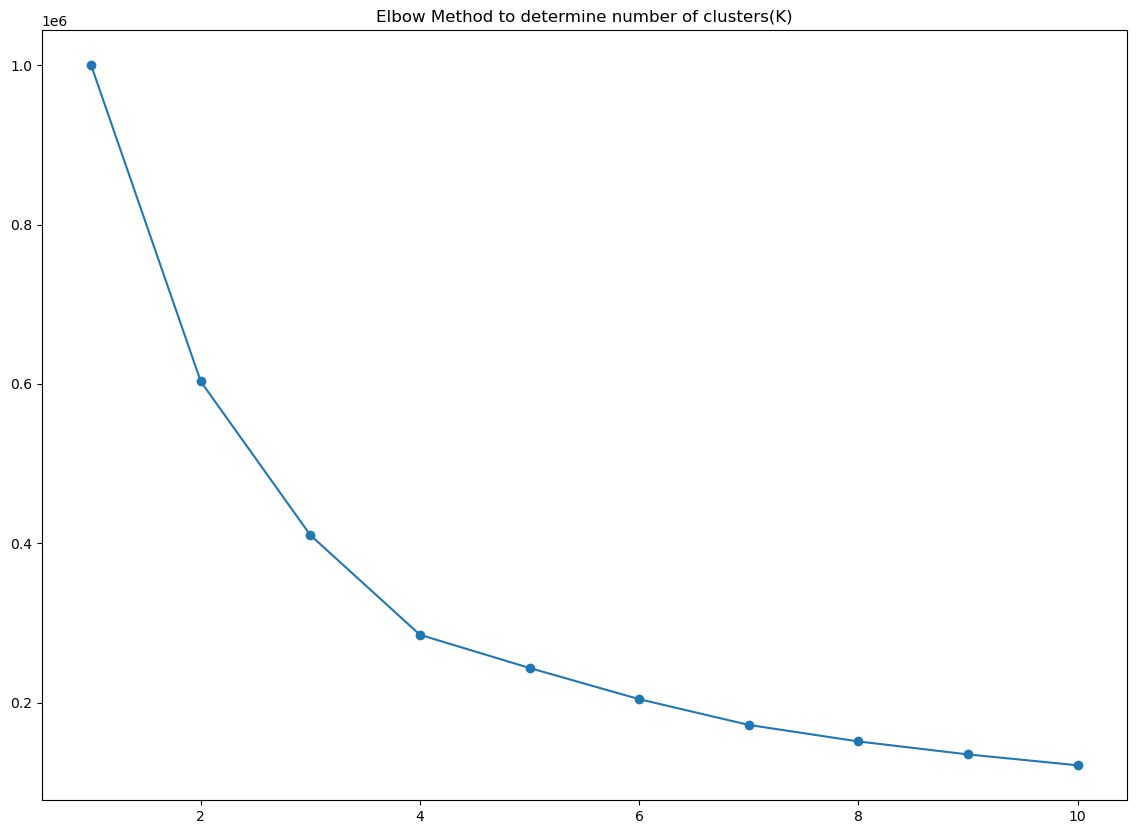

In [160]:
plt.figure(figsize=(14,10))
plt.plot(wcss_df.no_of_clusters, wcss_df.wcss_score, marker='o')
plt.title("Elbow Method to determine number of clusters(K)")
plt.show()

In [164]:
kmeans=KMeans(n_clusters=4,random_state=0)
kmeans.fit(data)
prediction=kmeans.fit_predict(data)
prediction

array([0, 1, 2, ..., 2, 2, 1])

In [165]:
clustered_data = dataset.copy()
clustered_data["cluster_index"] = prediction

<AxesSubplot:xlabel='Area', ylabel='Prices'>

C:\Users\faris\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


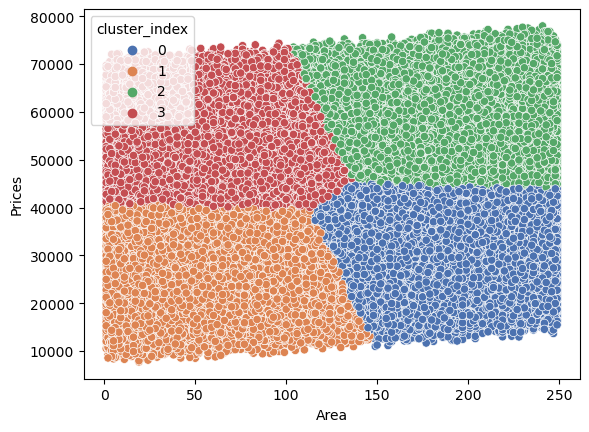

In [166]:
sns.scatterplot(x=clustered_data.Area,
                y=clustered_data.Prices,
                hue=clustered_data.cluster_index,
                palette="deep")